# HIV Model
Gail Romer

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *


In [2]:
"""
Α α, Β β, Γ γ, Δ δ, Ε ε, Ζ ζ, Η η, Θ θ, Ι ι, Κ κ, Λ λ, Μ μ, Ν ν, Ξ ξ, Ο ο, Π π, Ρ ρ, Σ σ/ς, Τ τ, Υ υ, Φ φ, Χ χ, Ψ ψ, Ω ω
"""

'\nΑ α, Β β, Γ γ, Δ δ, Ε ε, Ζ ζ, Η η, Θ θ, Ι ι, Κ κ, Λ λ, Μ μ, Ν ν, Ξ ξ, Ο ο, Π π, Ρ ρ, Σ σ/ς, Τ τ, Υ υ, Φ φ, Χ χ, Ψ ψ, Ω ω\n'

In [9]:
cd4_lymphocytes = 200;
latently_affected_cells = 0;
actively_effective_cells = 0;
free_virons=100;



state = State(R = cd4_lymphocytes, L = latently_affected_cells, E = actively_effective_cells, V = free_virons)
system = System(Γ = 1.36,               #Per Day
                                            #constraint 1 of 'birthrate' of R
                τ = 0.2,                #Per Day
                                            #constraint 2 of 'birthrate' of R
                μ = 0.00136,       #Per Day                             
                                            #deathrate of R and L (proportional to R and L themselves)
                Β = 0.00027,            #Per Viron
                                            #transitionrate from R to either E or L 
                    #Thats a beta, copy paste
                ρ = 0.1,                #Per Day
                                            #transitionrate of ΒR to L (proportional to free virons) (1-rho is transition rate of BR to E) 
                α = 0.036,        #Per Day
                                            #transitionrate of L to E
                δ = 0.33,               #Per Day
                                            #deathrate of E (proportional to E itself)
                π = 100,                #Per Day
                                            #'birthrate' of V (proportional to E) 
                σ = 2,                   #Per Day 
                                            #deathrate of V (proportional to V itself)
                t_0 = 0,
                
                t_end = 1000,
                
                dt = 0.01
               );

In [19]:
def update_func(state, t, system):
    """INFORMATION
    Update r, l, e, v population numbers
    
    state = (R, L, E, V)
    t = time
    system = system object
    """ 
    R, L, E, V = state
    unpack(system)

#     R = Γτ - μR - ΒRV;
    r_ = (Γ*τ - μ*R - Β*R*V) * dt
#     L = ρΒRV - μL - αL;
    l_ = (ρ*Β*R*V - μ*L - α*L) * dt
#     E = (1-ρ)ΒRV + αL - δE;
    e_ = ((1-ρ)*Β*R*V + α*L - δ*E) * dt
#     V = πE - σV;
    v_ = (π*E - σ*V) * dt

    r = R + r_
    l = L + l_ 
    e = E + e_
    v = V + v_
   
    
    return State(R=r, L=l, E=e, V=v)

In [11]:
new = update_func(state, system.t_0, system)

,values
R,199.9460
L,0.0054
E,0.0486
V,98.0000


In [12]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=state.index)
    frame.row[t_0] = state
    
    for t in linrange(t_0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame


In [16]:
def plot_data(data):
    unpack(data)
    plot(R, label="R")
    plot(L, label="L")
    plot(E, label="E")
    decorate(xlabel = "0.01 days",
            ylabel = "Cell Populations",
            title="R, L, & E Populations")

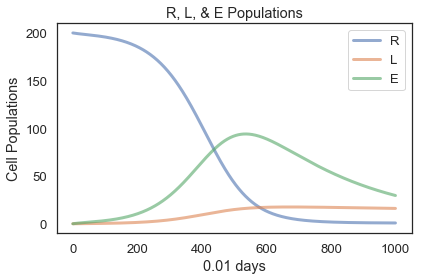

In [18]:
something = run_simulation(system, update_func)
plot_data(something)